# DBSCAN code tutorial:
In this notebook, we will introduce DBSCAN, then compare DBSCAN to K-means and hierarchical clustering.

## Part 1: DBSCAN Intuition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

We'll make fake data to demonstrate DBSCAN's power.

In [3]:
##generate a fake dataset. 
##Note that here I intentionally made the std low so it would be a better fit to use DBSCAN as clusterin method!
X, y_true = make_blobs(n_samples=120, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

print(X.shape)
print(y_true.shape)

(120, 2)
(120,)


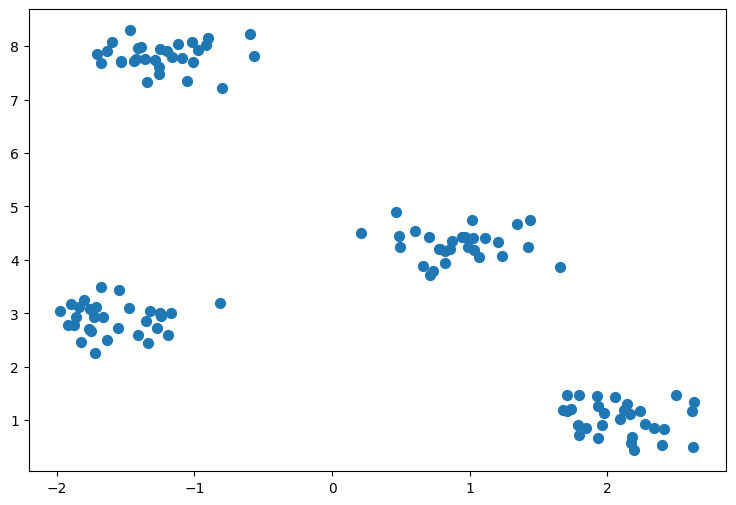

In [4]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50);

Next, just like other clustering algorithms, we use fit_predict to create labels for the data. Note that DBSCAN takes eps (epsilon) and min_samples. Epsilon is the radius of the neighborhood around each point. If one point is in the neighborhood of another, they will belong to the same cluster. Min_samples controls what the minimum number of data points in a cluster can be.

In [5]:
#run DBSCAN function from sklearn package. Note that Epsilon and min=samples here are chosen arbitrarily 
#so we can test it out and adjust accordingly.
dbscan = DBSCAN(eps=0.3, min_samples=2)
clusters = dbscan.fit_predict(X)

Epsilon was chosen arbitrarily, so we are not guaranteed a good fit initially. There are ways to improve on epsilon, such as silhouette score.

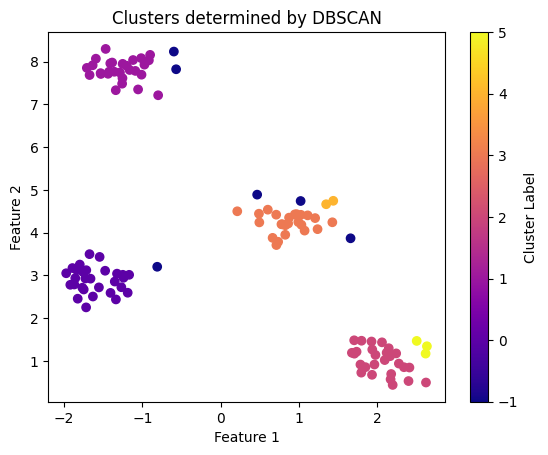

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by DBSCAN')
plt.colorbar(label='Cluster Label')
plt.show()

A good fit for the data, which is well spread out in this example, is 0.7:

In [7]:
new_dbscan = DBSCAN(eps=0.7, min_samples=2)
new_clusters = new_dbscan.fit_predict(X)

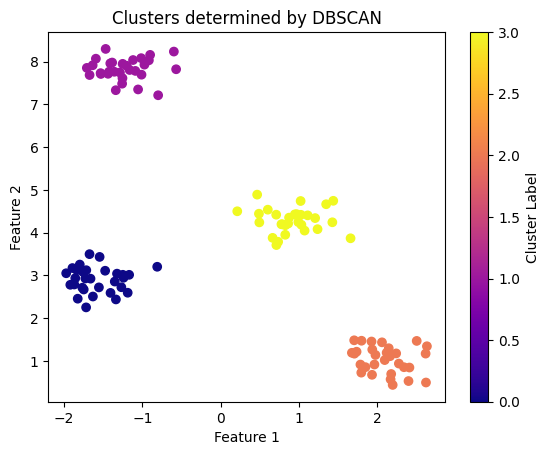

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=new_clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by DBSCAN')
plt.colorbar(label='Cluster Label')
plt.show()

## Part 2: Comparing Time and Quality of DBSCAN vs. other clustering algorithms

We can compare the time complexity of DBSCAN to algorithms we've already been introduced to using the timeit library. First we'll define the previous algorithms (k-means and hierarchical).

In [9]:
from scipy.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

# def hierarchical_cluster(n):
X, y_true = make_blobs(n_samples=300, 
                    centers=4,
                    cluster_std=0.30, 
                    random_state=0)
Z = AgglomerativeClustering(X,
                            n_clusters=4,
                            metric='euclidean') 

We specify that we want 4 clusters from the data using SciPy's fcluster function:

In [10]:
# Specifying the number of clusters
num_clusters = 4

# Assigning cluster labels based on the hierarchical clustering results
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

Let's compare the quality of fit to the actual labels using silhouette score.

In [11]:
from sklearn.metrics import silhouette_score

def quality(fit, labels):
    # Evaluate clustering performance
    silhouette_avg = silhouette_score(fit, labels)
    print("Silhouette Score:", silhouette_avg)
quality(X, cluster_labels)

Silhouette Score: 0.8409676710250639


The silhouette score is close to 1, which reassures us that the fit is likely good.

Next, we'll reproduce code for clustering using K-means.

In [12]:
from sklearn.cluster import KMeans

# Code snippet taken from Eni's clustering walkthrough
X, y_true = make_blobs(n_samples=200, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

kmeans = KMeans(n_clusters=4)  # step 1: initialize the model
kmeans.fit(X)                  # step 2: fit the data to the model
y_kmeans = kmeans.predict(X)   # step 3: prediction

In [13]:
quality(X, y_kmeans)

Silhouette Score: 0.8408057662056734


Finally, we can wrap the previous algorithms into functions and compare their time complexity. We'll time them different input sizes using the timeit library.

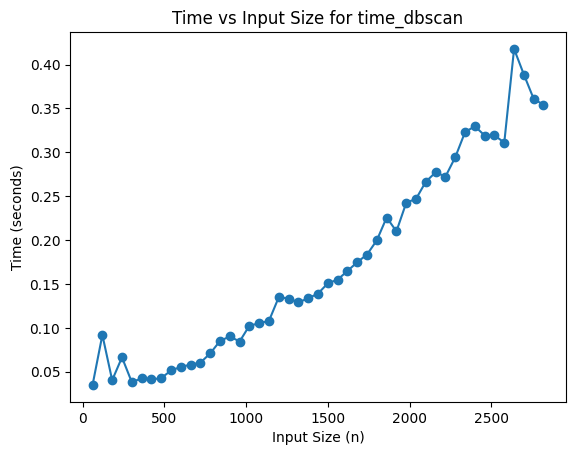

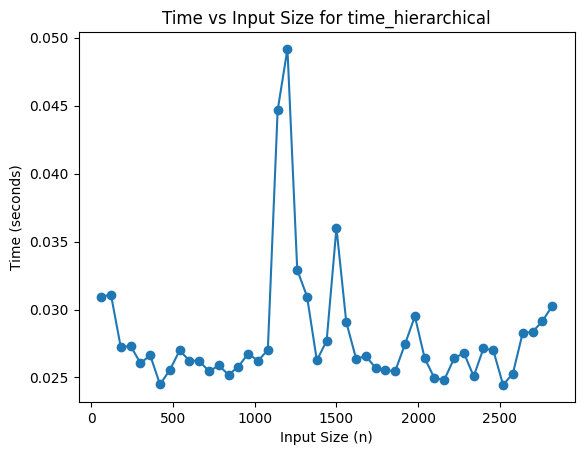

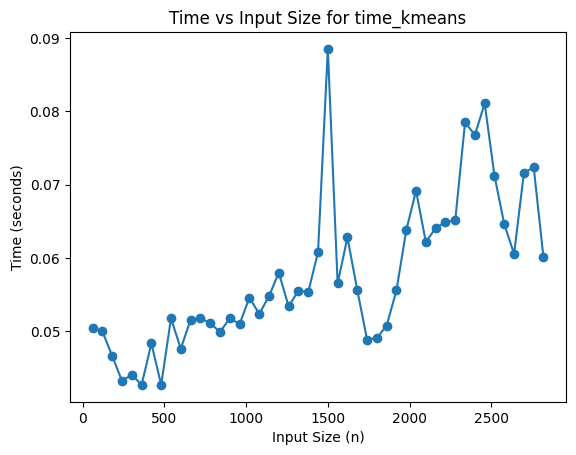

In [14]:
import timeit

def run_dbscan(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    dbscan = DBSCAN(eps=0.3, min_samples=2)
    clusters = dbscan.fit_predict(X)
    return clusters

def run_k_means(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

    kmeans = KMeans(n_clusters=4)  # step 1: initialize the model
    kmeans.fit(X)                  # step 2: fit the data to the model
    y_kmeans = kmeans.predict(X)   # step 3: prediction
    return y_kmeans

def run_hierarchical(n, num_clusters):
    X, y_true = make_blobs(n_samples=300, 
                    centers=4,
                    cluster_std=0.30, 
                    random_state=0)
    Z = linkage(X, 
                method='single', 
                metric='euclidean') 
    
    # Assigning cluster labels based on the hierarchical clustering results,
    # supposing we know num_clusters ahead of time
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
    return cluster_labels

# Define different input sizes
input_sizes = range(60, 2880, 60)

def time_kmeans(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_k_means({n})', globals=globals(), number=20)
        times.append(time)
    return times

def time_hierarchical(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_hierarchical({n}, 4)', globals=globals(), number=20)
        times.append(time)
    return times

def time_dbscan(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_dbscan({n})', globals=globals(), number=20)
        times.append(time)
    return times

# Plotting
def plot(function, input_sizes):
    plt.plot(input_sizes, function(input_sizes), marker='o')
    plt.title(f'Time vs Input Size for {function.__name__}')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.show()
plot(time_dbscan, input_sizes)
plot(time_hierarchical, input_sizes)
plot(time_kmeans, input_sizes)

Time complexity-wise, K-means and DBSCAN seem to do about the same. Hierarchical performs the best by a mile.

In principle, we'd want to use the elbow method to determine the best value for K in k-means, and the best value for epsilon in DBSCAN's case. Let's do that and see how it affects runtime.

This is the code for sweeping values of epsilon:

In [15]:
from sklearn.metrics import silhouette_score
def sweep_epsilons(X):
    scores = []
    for eps in list(np.arange(0.01, 0.05, 0.01)) + list(np.arange(0.1, 0.5, 0.1)):
        model = DBSCAN(eps=eps, min_samples=3, metric='cosine')
        labels = model.fit_predict(X)
        if len(set(labels)) > 1:  # More than 1 cluster plus noise must be present to calculate silhouette
            score = silhouette_score(X, labels)
            scores.append((eps, score))
    return max(scores, key=lambda x: x[1])[0]

def run_dbscan(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    e = sweep_epsilons(X)
    # print(e)
    dbscan = DBSCAN(eps=e, min_samples=2)
    clusters = dbscan.fit_predict(X)
    return clusters

def time_dbscan(input_sizes):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_dbscan({n})', globals=globals(), number=20)
        times.append(time)
    return times

And this is code for using the elbow method, then finding the point of inflection at that point:

In [16]:
def elbow_method(X):
    # Calculate WCSS for different values of k
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Compute the second derivative of the curve
    second_derivative = np.diff(np.diff(wcss))

    # Find the index corresponding to the maximum second derivative
    elbow_point_index = np.argmax(second_derivative) + 1  # Adding 1 to account for the first diff
    return elbow_point_index

def run_k_means(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    k = elbow_method(X)
    # print(k)
    kmeans = KMeans(n_clusters=k)  # step 1: initialize the model
    kmeans.fit(X)                  # step 2: fit the data to the model
    y_kmeans = kmeans.predict(X)   # step 3: prediction
    return y_kmeans

def time_kmeans(input_sizes):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_k_means({n})', globals=globals(), number=20)
        times.append(time)
    return times

Now we can compare them again:

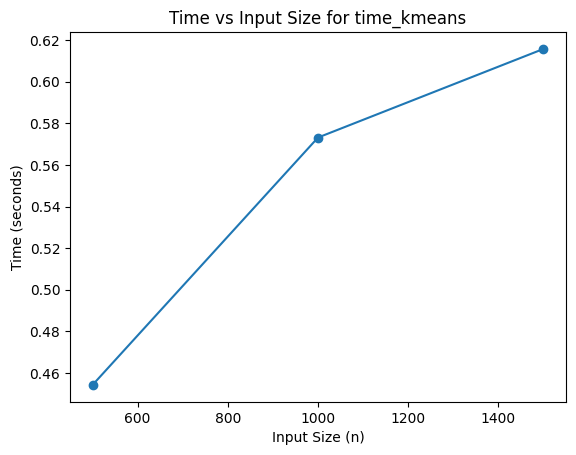

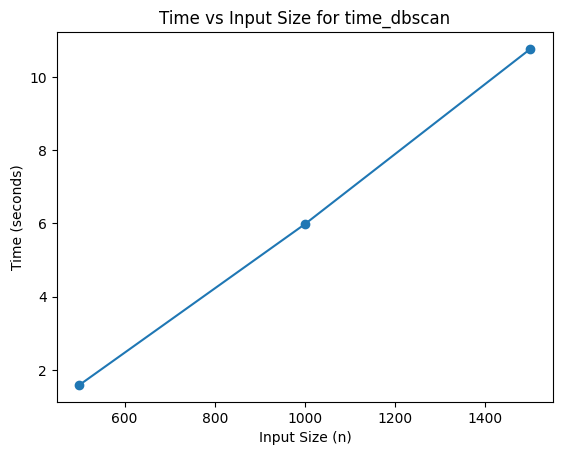

In [17]:
input_sizes = [500, 1000, 1500]
plot(time_kmeans, input_sizes)
plot(time_dbscan, input_sizes)

DBScan clearly takes longer. Not many input sizes were used as these updated functions take a long time to run. However, this result is expected since [literature verifies this result](https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html). Hierarchical clustering worked the fastest of the three, but note that it is not as useful when we do not know the number of clusters we want to use ahead of time, as we did in the case where we timed it. In general, hierarchical clustering would be less useful than either K-means or DBSCAN in larger datasets.